# *Prediction will not be good enough.We can say it cannot predict stock prices .Taking only 1 column is wrong way to predict. *

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.preprocessing import StandardScaler 

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/tesla-stock-price.csv')
df.head()

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700


In [ ]:
data=df['close'].values.reshape(-1,1)

In [ ]:
scaler=StandardScaler()
scaler.fit(data[:len(data)//2])
data=scaler.transform(data).flatten()
data

array([-1.91880978e+00, -2.31075948e+00, -2.33988601e+00, -2.57541541e+00,
       -2.40820752e+00, -2.19533209e+00, -2.63546642e+00, -2.22589697e+00,
       -1.51103827e+00, -1.04465409e+00, -8.20991057e-01, -4.72910963e-01,
       -2.12449347e+00, -5.87259589e-01, -5.13184693e-01, -8.22069817e-01,
       -8.69175698e-01, -8.90031737e-01, -9.17719926e-01, -8.92908432e-01,
       -1.39848758e+00, -1.04321574e+00, -1.03027062e+00, -1.23667348e+00,
       -1.19783810e+00, -1.59697953e+00, -1.37906989e+00, -2.17951027e+00,
       -1.54268191e+00, -1.55023324e+00, -1.25501241e+00, -7.97977497e-01,
       -7.44399053e-01, -6.77515894e-01, -4.31198885e-01, -1.64745012e-01,
       -3.70916714e-02, -1.34899301e-01, -7.95229226e-02, -7.01736638e-02,
       -5.54177596e-01, -6.59896137e-01,  4.17066550e-01,  5.33572698e-01,
        8.55402950e-01,  1.17076064e+00,  1.13767865e+00,  1.02836424e+00,
        1.67166515e+00,  2.00356384e+00,  6.52236366e-01,  8.74461054e-01,
        9.23724456e-01, -

In [ ]:
import numpy as np
T=10
D=1
dataset=[]
target=[]
for t in range(len(data)-T):
  x=data[t:t+T]
  dataset.append(x)
  y=data[t+T]
  target.append(y) 
N=len(dataset)
print(N)

dataset=np.array(dataset).reshape(N,T,D)
target=np.array(target).reshape(N)
print(dataset)
print(target)

747
[[[-1.91880978]
  [-2.31075948]
  [-2.33988601]
  ...
  [-2.22589697]
  [-1.51103827]
  [-1.04465409]]

 [[-2.31075948]
  [-2.33988601]
  [-2.57541541]
  ...
  [-1.51103827]
  [-1.04465409]
  [-0.82099106]]

 [[-2.33988601]
  [-2.57541541]
  [-2.40820752]
  ...
  [-1.04465409]
  [-0.82099106]
  [-0.47291096]]

 ...

 [[-3.95766736]
  [-4.20434395]
  [-4.03533812]
  ...
  [-4.03210184]
  [-4.0907145 ]
  [-3.98499596]]

 [[-4.20434395]
  [-4.03533812]
  [-3.98751307]
  ...
  [-4.0907145 ]
  [-3.98499596]
  [-3.44309854]]

 [[-4.03533812]
  [-3.98751307]
  [-4.08136524]
  ...
  [-3.98499596]
  [-3.44309854]
  [-3.48229351]]]
[-8.20991057e-01 -4.72910963e-01 -2.12449347e+00 -5.87259589e-01
 -5.13184693e-01 -8.22069817e-01 -8.69175698e-01 -8.90031737e-01
 -9.17719926e-01 -8.92908432e-01 -1.39848758e+00 -1.04321574e+00
 -1.03027062e+00 -1.23667348e+00 -1.19783810e+00 -1.59697953e+00
 -1.37906989e+00 -2.17951027e+00 -1.54268191e+00 -1.55023324e+00
 -1.25501241e+00 -7.97977497e-01 -7.44399

In [ ]:
i=Input(shape=(T,D))
x=LSTM(5)(i)
x=Dense(1)(x)
model=Model(i,x)

model.compile(optimizer=Adam(lr=0.1),
              loss='mse')

r=model.fit(dataset[:N//2],target[:N//2],validation_data=(dataset[N//2:],target[N//2:]),epochs=200)

Epoch 1/200
12/12 [==============================] - 2s 48ms/step - loss: 0.4794 - val_loss: 6.5564
Epoch 2/200
12/12 [==============================] - 0s 9ms/step - loss: 0.1284 - val_loss: 4.7319
Epoch 3/200
12/12 [==============================] - 0s 10ms/step - loss: 0.1250 - val_loss: 4.7823
Epoch 4/200
12/12 [==============================] - 0s 10ms/step - loss: 0.1254 - val_loss: 4.2239
Epoch 5/200
12/12 [==============================] - 0s 9ms/step - loss: 0.1429 - val_loss: 4.0909
Epoch 6/200
12/12 [==============================] - 0s 10ms/step - loss: 0.1302 - val_loss: 4.0324
Epoch 7/200
12/12 [==============================] - 0s 9ms/step - loss: 0.1163 - val_loss: 4.4199
Epoch 8/200
12/12 [==============================] - 0s 10ms/step - loss: 0.1086 - val_loss: 3.4628
Epoch 9/200
12/12 [==============================] - 0s 11ms/step - loss: 0.1186 - val_loss: 3.0173
Epoch 10/200
12/12 [==============================] - 0s 11ms/step - loss: 0.1235 - val_loss: 3.5264
Ep

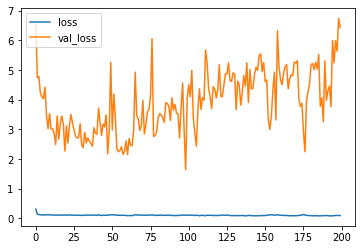

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

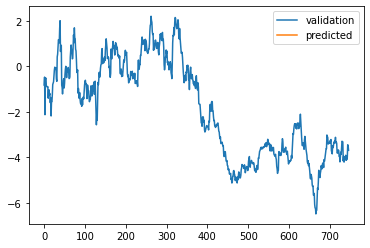

[310.10156]
373
[[313.79]
 [308.03]
 [305.6 ]
 [302.51]
 [305.52]
 [300.25]
 [301.44]
 [304.  ]
 [296.84]
 [308.71]]


In [ ]:
#1 step prediction
predicted=model.predict(dataset[N//2].reshape(-1,T,1))
predicted=predicted[:,0]
value=scaler.inverse_transform(predicted)
plt.plot(target,label='validation')
plt.plot(predicted,label='predicted')
plt.legend()
plt.show()
l=scaler.inverse_transform(dataset[N//2])
print(value)
print(N//2)
print(l)

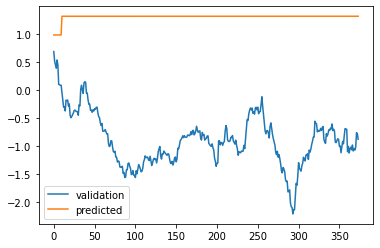

In [ ]:
validation=target[N//2:]
predicted=[]
last=dataset[N//2]
while len(predicted)<len(validation):
  p=model.predict(last.reshape(-1,T,1))[0,0]
  predicted.append(p)
  last=np.roll(last,-1)
  last[-1]=p

plt.plot(validation,label='validation')
plt.plot(predicted,label='predicted')
plt.legend()

# Taking all columns at 1 time and try to predict stock return.But still it cant predict.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.preprocessing import StandardScaler 

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/tesla-stock-price.csv')
df.head()

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700


In [ ]:
df['prevclose']=df['close'].shift(1)
df.head()

,date,close,volume,open,high,low,prevclose
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400,NaN
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367,270.49
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100,259.59
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300,258.78
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700,252.23


In [ ]:
df['return']=(df['close']-df['prevclose'])/df['prevclose']
df.head()

,date,close,volume,open,high,low,prevclose,return
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400,NaN,NaN
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367,270.49,-0.040297
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100,259.59,-0.003120
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300,258.78,-0.025311
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700,252.23,0.018436


In [ ]:
input_data=df[['close','open','high','low']].values
target=df['return'].values
input_data

array([[270.49  , 264.5   , 273.88  , 262.24  ],
       [259.59  , 259.06  , 263.28  , 254.5367],
       [258.78  , 261.    , 261.99  , 252.01  ],
       ...,
       [228.1   , 226.5   , 231.15  , 224.94  ],
       [227.01  , 223.04  , 230.4805, 222.87  ],
       [221.31  , 216.43  , 221.73  , 213.7   ]])

In [ ]:
scaler=StandardScaler()
scaler.fit(input_data[:len(input_data)//2])
input_data=scaler.transform(input_data)
input_data

array([[-1.91880978, -2.11857541, -1.99361287, -1.98970099],
       [-2.31075948, -2.31212768, -2.37482109, -2.26378293],
       [-2.33988601, -2.24310352, -2.42121341, -2.35368243],
       ...,
       [-3.44309854, -3.47059489, -3.53031353, -3.31682787],
       [-3.48229351, -3.59369982, -3.55439079, -3.39047807],
       [-3.68725803, -3.82888005, -3.86908536, -3.71674492]])

In [ ]:
T=10
D=4
N=(len(input_data))-T

In [ ]:
L=len(input_data)//2
X_train=np.zeros((N,T,D))
Y_train=np.zeros(N)
for t in range(N//2):
  X_train[t::]=input_data[t:t+T]
  Y_train[t]=(target[t+T]>0)

print(X_train)
print(Y_train)

[[[-1.91880978 -2.11857541 -1.99361287 -1.98970099]
  [-2.31075948 -2.31212768 -2.37482109 -2.26378293]
  [-2.33988601 -2.24310352 -2.42121341 -2.35368243]
  ...
  [-2.22589697 -1.7574439  -1.95764983 -2.06939976]
  [-1.51103827 -1.07076032 -1.27003652 -1.44070453]
  [-1.04465409 -0.73702499 -0.88882831 -0.94614518]]

 [[-2.31075948 -2.31212768 -2.37482109 -2.26378293]
  [-2.33988601 -2.24310352 -2.42121341 -2.35368243]
  [-2.57541541 -2.36656425 -2.41186302 -2.45971027]
  ...
  [-1.51103827 -1.07076032 -1.27003652 -1.44070453]
  [-1.04465409 -0.73702499 -0.88882831 -0.94614518]
  [-0.82099106 -0.35917113 -0.44864071 -0.67645023]]

 [[-2.33988601 -2.24310352 -2.42121341 -2.35368243]
  [-2.57541541 -2.36656425 -2.41186302 -2.45971027]
  [-2.40820752 -2.11466167 -2.29462351 -2.50454082]
  ...
  [-1.04465409 -0.73702499 -0.88882831 -0.94614518]
  [-0.82099106 -0.35917113 -0.44864071 -0.67645023]
  [-0.47291096 -0.65021111 -0.64284112 -0.60884859]]

 ...

 [[ 0.49581608  0.86191593  0.7151

In [ ]:
X_test=np.zeros((N,T,D))
Y_test=np.zeros(N)
for u in range(N//2):
  t=u+(N//2)
  X_test[u::]=input_data[t:t+T]
  Y_test[u]=(target[t+T]>0)

print(X_test)
print(Y_test)

[[[ 0.79247525  1.08642233  0.9147181   0.9022259 ]
  [ 1.04059019  1.279263    1.12150558  1.16836287]
  [ 0.996361    0.90212072  1.02548426  1.10431922]
  ...
  [ 0.44475474  0.51892994  0.39900812  0.55176478]
  [ 0.50696327  0.39831557  0.5572419   0.53717706]
  [ 0.3936934   0.29015402  0.27637416  0.42118688]]

 [[ 1.04059019  1.279263    1.12150558  1.16836287]
  [ 0.996361    0.90212072  1.02548426  1.10431922]
  [ 0.94098463  0.7455711   0.76510826  0.86949248]
  ...
  [ 0.50696327  0.39831557  0.5572419   0.53717706]
  [ 0.3936934   0.29015402  0.27637416  0.42118688]
  [ 0.35377926  0.39546922  0.34110763  0.32885728]]

 [[ 0.996361    0.90212072  1.02548426  1.10431922]
  [ 0.94098463  0.7455711   0.76510826  0.86949248]
  [ 0.74500978  0.76940934  0.82660866  0.91005346]
  ...
  [ 0.3936934   0.29015402  0.27637416  0.42118688]
  [ 0.35377926  0.39546922  0.34110763  0.32885728]
  [ 0.45158689 -0.28623323  0.27708982 -0.09472035]]

 ...

 [[-0.46140418 -0.22681554 -0.2799

In [ ]:
i=Input(shape=(T,D))
x=LSTM(50)(i)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)

model.compile(optimizer=Adam(lr=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

r=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=200)

Epoch 1/200
12/12 [==============================] - 3s 60ms/step - loss: 0.6811 - accuracy: 0.5919 - val_loss: 1.1430 - val_accuracy: 0.2500
Epoch 2/200
12/12 [==============================] - 0s 13ms/step - loss: 0.4869 - accuracy: 0.7732 - val_loss: 1.1129 - val_accuracy: 0.2636
Epoch 3/200
12/12 [==============================] - 0s 13ms/step - loss: 0.4546 - accuracy: 0.7899 - val_loss: 1.0492 - val_accuracy: 0.2690
Epoch 4/200
12/12 [==============================] - 0s 16ms/step - loss: 0.4752 - accuracy: 0.7881 - val_loss: 0.9947 - val_accuracy: 0.2690
Epoch 5/200
12/12 [==============================] - 0s 16ms/step - loss: 0.4904 - accuracy: 0.7664 - val_loss: 0.8078 - val_accuracy: 0.2772
Epoch 6/200
12/12 [==============================] - 0s 15ms/step - loss: 0.4237 - accuracy: 0.8089 - val_loss: 0.7945 - val_accuracy: 0.7690
Epoch 7/200
12/12 [==============================] - 0s 16ms/step - loss: 0.3890 - accuracy: 0.7751 - val_loss: 1.1155 - val_accuracy: 0.2636
Epoch 

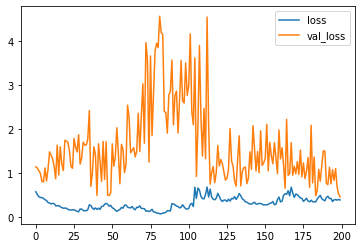

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

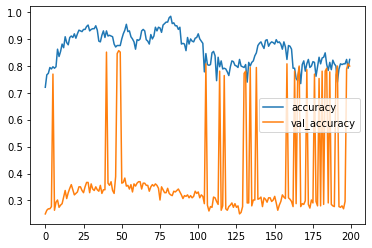

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
y=model.predict(X_test)
y

array([[0.03566867],
       [0.83105755],
       [0.08400071],
       [0.12318674],
       [0.13738865],
       [0.50188386],
       [0.42355   ],
       [0.21617988],
       [0.09617394],
       [0.6254643 ],
       [0.21952197],
       [0.7415038 ],
       [0.29447317],
       [0.7983955 ],
       [0.6044023 ],
       [0.8320091 ],
       [0.6369254 ],
       [0.35796142],
       [0.42523867],
       [0.0861083 ],
       [0.49815357],
       [0.6276296 ],
       [0.63197154],
       [0.17742103],
       [0.55322593],
       [0.1556015 ],
       [0.05858642],
       [0.22367263],
       [0.1075767 ],
       [0.16873062],
       [0.04429847],
       [0.16137555],
       [0.2764492 ],
       [0.03002101],
       [0.14595807],
       [0.23814258],
       [0.18941888],
       [0.03108108],
       [0.15929297],
       [0.28650206],
       [0.15238246],
       [0.3667099 ],
       [0.26282412],
       [0.11196014],
       [0.16216636],
       [0.39764696],
       [0.21052921],
       [0.682